# Logistic regression model

## Import Packages:
### 1. preprocessing
### 2. LogesticRegression
### 3. Train_test_split
### 4. metrics
### 5. claasification_report


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the data

claimants = pd.read_csv('claimants.csv')
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [4]:
claimants.shape

(1340, 7)

In [5]:
claimants.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [6]:
claimants.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [7]:
#since ['CASENUM'] is not required in analysis we can drop.
claimants.drop(['CASENUM'], inplace=True, axis=1)

In [8]:
#claimants

# Visualization 

<AxesSubplot:xlabel='ATTORNEY', ylabel='CLMAGE'>

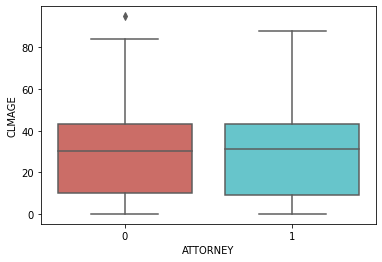

In [9]:
# since we have categorical data we can do limited visualization
sn.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="hls") 

<AxesSubplot:xlabel='ATTORNEY', ylabel='count'>

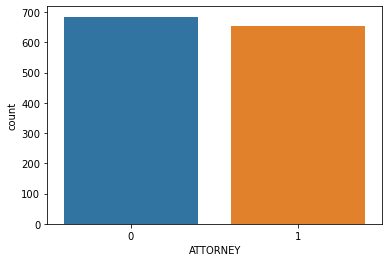

In [10]:
sn.countplot(x='ATTORNEY',data=claimants)

In [11]:
# climinsur ( 0 = yes, 1 = no)
# attorney (0 = no, 1 = yes)
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR)

CLMINSUR,0.0,1.0
ATTORNEY,,
0,76,585
1,44,594


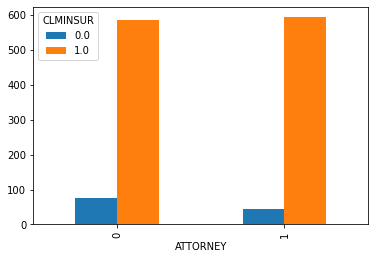

In [12]:
# attorney vs insurance
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='SEATBELT', ylabel='count'>

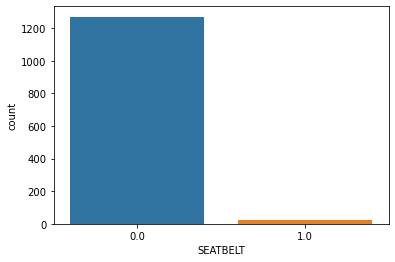

In [13]:
sn.countplot(x='SEATBELT', data=claimants)

In [14]:
claimants['SEATBELT'].value_counts()

0.0    1270
1.0      22
Name: SEATBELT, dtype: int64

In [15]:
claimants['CLMINSUR'].value_counts()

1.0    1179
0.0     120
Name: CLMINSUR, dtype: int64

<AxesSubplot:xlabel='SEATBELT'>

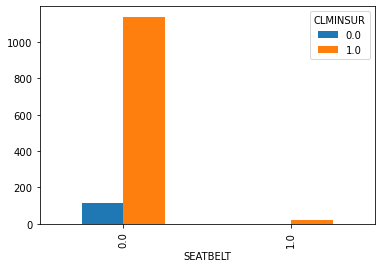

In [16]:
# seatbelt vs insurance
# clminsur ( 0 = yes , 1 = no)
# seatbelt (0 = yes, 1 = no)
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind='bar')

<AxesSubplot:xlabel='CLMSEX', ylabel='count'>

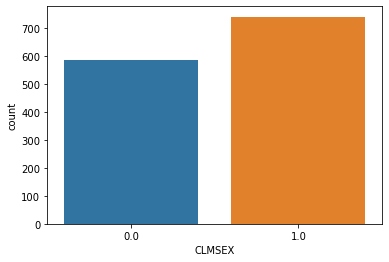

In [17]:
# (0 = male, 1 = female)
sn.countplot(x='CLMSEX', data=claimants)

In [18]:
claimants['CLMSEX'].value_counts()

1.0    742
0.0    586
Name: CLMSEX, dtype: int64

<AxesSubplot:xlabel='CLMSEX'>

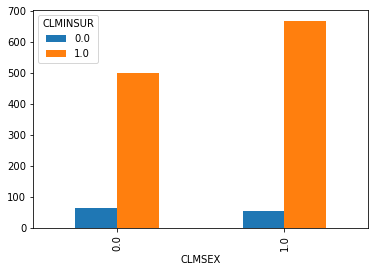

In [19]:
# gender vs insurance
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind='bar')

In [20]:
claimants['CLMINSUR'].value_counts()

1.0    1179
0.0     120
Name: CLMINSUR, dtype: int64

# Handling NULL values -Imputation

In [21]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [22]:
# IMPUTATION TECHNIQUES- 
# FOR CATEGORICAL VALUES--->MODE
claimants.CLMINSUR.mode()
claimants.CLMSEX.mode()
claimants.SEATBELT.mode()

0    0.0
Name: SEATBELT, dtype: float64

In [23]:
# IMPUTATION TECHNIQUES- 
# FOR NUMERICAL VALUES ---> MEAN OR MEDIAN
claimants.CLMAGE.mean()

28.414422241529106

In [24]:
# Fill nan values with mode of the categorical column 
claimants['CLMINSUR'].fillna(1,inplace = True) # mode value = 1
claimants['CLMSEX'].fillna(1, inplace=True)# mode value = 1
claimants['SEATBELT'].fillna(0,inplace=True)# mode value = 0

In [25]:
claimants['CLMAGE'].fillna(28.4144, inplace= True)# mean value= 28.4144

In [26]:
claimants.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [27]:
claimants.shape
#claimants

(1340, 6)

# Model building with train_test_split

In [28]:
# selecting columns
# Divide our data into input and putput variables
#x= claimants.iloc[:,[11,2,3,4,5]]
#y= claimants.iloc[:,0]

x= claimants.iloc[:,1:]
y= claimants.iloc[:,0]

In [29]:
#split x and y into training and testing tests
# random_state = seed value
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 0) 

In [30]:
#Logistic Regression and fit the model 
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [31]:
#coefficent feature/beta values
#classifier.coef_

# Training Accuracy

In [32]:
y_pred_train= classifier.predict(x_train)

In [33]:
#Creating a DataFrame just to compair btn AV vs Predicted values
y_pred_train_df=pd.DataFrame({'actual': y_train,
                             'predicted_proba':y_pred_train})

In [34]:
#y_pred_train_df

In [35]:
# provide AV(y_train) and PV(y_pred_train)
from sklearn.metrics import accuracy_score
print(f' training-set accuracy score: {round(accuracy_score(y_train,y_pred_train),3)}')

 training-set accuracy score: 0.71


# Testing Accuracy

In [36]:
y_pred_test= classifier.predict(x_test)

In [37]:
y_pred_test_df= pd.DataFrame({'actual': y_test,
                             'predicted_proba':y_pred_test})

In [38]:
#y_pred_test_df

In [39]:
acc_val = accuracy_score(y_test,y_pred_test)
acc_val_rounded= round(acc_val,4)

In [40]:
print(f'testing-set accuracy score: {acc_val_rounded}')

testing-set accuracy score: 0.6604


# Accuracy of a Model

# 1. Confusion Matrix

In [41]:
# Confusion metrics

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_test)
print('confusion matrix\n\n', cm)

confusion matrix

 [[80 62]
 [29 97]]


In [42]:
TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

print('\n True positives(TP)= ', TP)
print('\n False positives(FP)= ', FP)
print('\n False negatives(FN)= ', FN)
print('\n True negatives(TN)= ', TN)


 True positives(TP)=  80

 False positives(FP)=  62

 False negatives(FN)=  29

 True negatives(TN)=  97


<AxesSubplot:>

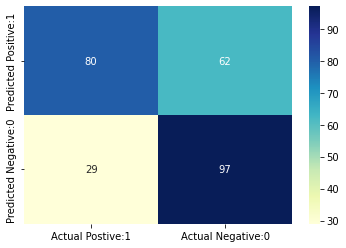

In [43]:
# Heatmap-- for visualizing confusion matrix
import seaborn as sns

cm_matrix = pd.DataFrame( data=cm, columns=['Actual Postive:1','Actual Negative:0'],
                                   index= ['Predicted Positive:1','Predicted Negative:0'] )

sns.heatmap(cm_matrix, annot=True, fmt ='d',cmap= 'YlGnBu')


# Classifcation Accuracy

In [44]:
classification_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(f' classification accuracy : {round(classification_accuracy,4)}')

 classification accuracy : 0.6604


# Classification Report

In [45]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.56      0.64       142
           1       0.61      0.77      0.68       126

    accuracy                           0.66       268
   macro avg       0.67      0.67      0.66       268
weighted avg       0.68      0.66      0.66       268



In [46]:
# Adjusting Threshold level
# two class classification
y_pred_prob= classifier.predict_proba(x_test)[0:10]
y_pred_prob

array([[7.21089337e-01, 2.78910663e-01],
       [8.67465158e-01, 1.32534842e-01],
       [1.00000000e+00, 4.53803141e-13],
       [5.80799331e-01, 4.19200669e-01],
       [6.39712324e-01, 3.60287676e-01],
       [6.04668896e-01, 3.95331104e-01],
       [7.11872970e-01, 2.88127030e-01],
       [3.35105507e-01, 6.64894493e-01],
       [4.92425727e-01, 5.07574273e-01],
       [3.54529658e-01, 6.45470342e-01]])

In [47]:
# Mistake 1
# NOTE attorney (0 = no, 1 = yes(consulting))
y_pred1= classifier.predict_proba(x_test)[:,1]
y_pred1

array([2.78910663e-01, 1.32534842e-01, 4.53803141e-13, 4.19200669e-01,
       3.60287676e-01, 3.95331104e-01, 2.88127030e-01, 6.64894493e-01,
       5.07574273e-01, 6.45470342e-01, 1.91589248e-07, 4.44365996e-01,
       3.28556704e-01, 3.01428763e-01, 3.06495495e-01, 6.26956175e-01,
       6.45893778e-01, 6.62116651e-01, 3.47233182e-01, 6.98541622e-01,
       6.89330065e-01, 7.13284442e-01, 6.29460830e-05, 5.65154602e-01,
       5.55939603e-01, 5.71230440e-01, 6.03734351e-01, 6.53424727e-01,
       5.17931643e-01, 6.40824279e-01, 6.08379331e-01, 5.10184680e-01,
       6.82007230e-01, 7.46244691e-01, 5.77628844e-01, 4.28865997e-01,
       3.70020618e-08, 1.56693409e-01, 3.54291428e-01, 5.59977742e-01,
       5.34853510e-01, 6.60436070e-01, 5.90063368e-01, 6.79114858e-01,
       6.26200529e-01, 4.40463477e-01, 1.89309192e-01, 7.06610174e-01,
       4.13225050e-01, 6.82324153e-01, 6.76850641e-01, 4.75894085e-01,
       4.59872524e-01, 4.56459924e-01, 6.44718719e-01, 6.45066742e-01,
      

# 2. ROC CURVE

In [51]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred1)

In [52]:
auc

0.7246534764140398

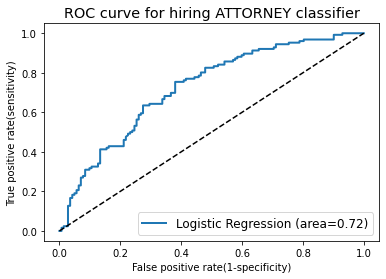

In [50]:
from sklearn.metrics import roc_curve

fpr,tpr, thresholds = roc_curve(y_test,y_pred1)

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, label='Logistic Regression (area=%0.2f)'%auc,linewidth=2)

plt.plot([0,1], [0,1], 'k--') #(plot Dummy classifiers from 0 to 1 on both axis, 'k--' = black color with ---dots)

plt.rcParams['font.size']= 12
plt.title('ROC curve for hiring ATTORNEY classifier')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.legend(loc="lower right")

plt.show()

# Finding best threshold value

In [75]:
fpr

array([0.        , 0.        , 0.        , 0.00145985, 0.00145985,
       0.00291971, 0.00291971, 0.00437956, 0.00437956, 0.00583942,
       0.00583942, 0.00729927, 0.00729927, 0.00875912, 0.00875912,
       0.01021898, 0.01021898, 0.01167883, 0.01167883, 0.01313869,
       0.01313869, 0.01459854, 0.01459854, 0.01605839, 0.01605839,
       0.01605839, 0.01605839, 0.01605839, 0.01605839, 0.01751825,
       0.01751825, 0.01751825, 0.01751825, 0.0189781 , 0.0189781 ,
       0.02043796, 0.02043796, 0.02189781, 0.02189781, 0.02481752,
       0.02481752, 0.02919708, 0.02919708, 0.03065693, 0.03065693,
       0.03357664, 0.03357664, 0.03357664, 0.0350365 , 0.0350365 ,
       0.03649635, 0.03649635, 0.0379562 , 0.0379562 , 0.03941606,
       0.03941606, 0.04379562, 0.04379562, 0.04525547, 0.04525547,
       0.04671533, 0.04671533, 0.04817518, 0.04817518, 0.04963504,
       0.04963504, 0.05109489, 0.05109489, 0.0540146 , 0.0540146 ,
       0.0540146 , 0.0540146 , 0.05547445, 0.05547445, 0.05839

In [76]:
tpr

array([0.        , 0.00152672, 0.00305344, 0.00305344, 0.00763359,
       0.00763359, 0.01984733, 0.01984733, 0.02442748, 0.02442748,
       0.02900763, 0.02900763, 0.03053435, 0.03053435, 0.03206107,
       0.03206107, 0.0351145 , 0.0351145 , 0.04580153, 0.04580153,
       0.06412214, 0.06412214, 0.06564885, 0.06564885, 0.06870229,
       0.07480916, 0.0870229 , 0.09007634, 0.09312977, 0.09312977,
       0.09618321, 0.10076336, 0.10992366, 0.10992366, 0.11603053,
       0.11603053, 0.12671756, 0.12671756, 0.12824427, 0.12824427,
       0.12977099, 0.12977099, 0.14656489, 0.14656489, 0.15114504,
       0.15114504, 0.15267176, 0.15572519, 0.15572519, 0.16030534,
       0.16030534, 0.16183206, 0.16335878, 0.17709924, 0.17709924,
       0.18625954, 0.18625954, 0.19083969, 0.19083969, 0.20152672,
       0.20152672, 0.20763359, 0.20916031, 0.21221374, 0.21221374,
       0.21374046, 0.21374046, 0.21679389, 0.21679389, 0.2259542 ,
       0.23206107, 0.23816794, 0.23816794, 0.23969466, 0.23969

In [77]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred1 = np.where(classifier.predict_proba(x_test)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred1, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls  

,thresholds,accuracy
227,5.933173e-01,0.690299
230,5.928995e-01,0.690299
229,5.931701e-01,0.690299
228,5.932108e-01,0.690299
226,5.943381e-01,0.686567
...,...,...
549,4.200284e-02,0.503731
550,4.038001e-02,0.500000
551,1.432688e-11,0.481343
552,7.980210e-12,0.481343


In [86]:
from numpy import argmax
J = tpr - fpr
ix_test = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh)) 

Best Threshold=0.525080


In [87]:
threshold = 0.525080
preds = np.where(classifier.predict_proba(x_test)[:,1] > threshold, 1, 0)
print(classification_report(y_test,preds)) 

              precision    recall  f1-score   support

           0       0.74      0.62      0.67       142
           1       0.64      0.75      0.69       126

    accuracy                           0.68       268
   macro avg       0.69      0.69      0.68       268
weighted avg       0.69      0.68      0.68       268



In [88]:
#check for overfitting  and underfitting
print(f'training set score: {round(classifier.score(x_train,y_train),4)}')
      
print(f'test set score: {round(classifier.score(x_test,y_test),4)}') 

training set score: 0.7118
test set score: 0.6716


# Model Building without train_test_split:

In [53]:
x = claimants.iloc[:,[1,2,3,4,5]]
y= claimants.iloc[:,0]


In [54]:
#x

In [55]:
classifier = LogisticRegression()
classifier.fit(x,y) 

LogisticRegression()

In [56]:
classifier.coef_  # coefficients of features   

array([[ 0.31711334,  0.5055713 , -0.52814335,  0.0066041 , -0.3224325 ]])

In [57]:
classifier.predict_proba (x) # Probability values   

array([[9.99974075e-01, 2.59253820e-05],
       [4.95386951e-01, 5.04613049e-01],
       [4.25082812e-01, 5.74917188e-01],
       ...,
       [2.85349951e-01, 7.14650049e-01],
       [6.86685509e-01, 3.13314491e-01],
       [3.38781941e-01, 6.61218059e-01]])

In [58]:
y_pred = classifier.predict(x)
claimants["y_pred"] = y_pred
claimants 

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred
0,0,0.0,1.0,0.0,50.0000,34.940,0
1,1,1.0,0.0,0.0,18.0000,0.891,1
2,1,0.0,1.0,0.0,5.0000,0.330,1
3,0,0.0,1.0,1.0,31.0000,0.037,1
4,1,0.0,1.0,0.0,30.0000,0.038,1
...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.4144,0.576,1
1336,0,1.0,1.0,0.0,46.0000,3.705,0
1337,1,1.0,1.0,0.0,39.0000,0.099,1
1338,0,1.0,0.0,0.0,8.0000,3.177,0


In [59]:
#two class classification
y_prob = pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))
new_df = pd.concat([claimants,y_prob],axis=1)
new_df 

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred,0,1
0,0,0.0,1.0,0.0,50.0000,34.940,0,0.999974,0.000026
1,1,1.0,0.0,0.0,18.0000,0.891,1,0.495387,0.504613
2,1,0.0,1.0,0.0,5.0000,0.330,1,0.425083,0.574917
3,0,0.0,1.0,1.0,31.0000,0.037,1,0.490007,0.509993
4,1,0.0,1.0,0.0,30.0000,0.038,1,0.363271,0.636729
...,...,...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.4144,0.576,1,0.406789,0.593211
1336,0,1.0,1.0,0.0,46.0000,3.705,0,0.549435,0.450565
1337,1,1.0,1.0,0.0,39.0000,0.099,1,0.285350,0.714650
1338,0,1.0,0.0,0.0,8.0000,3.177,0,0.686686,0.313314


# Accuracy method

# 1.Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix) 


[[435 250]
 [147 508]]


In [61]:
pd.crosstab(y_pred,y)  

ATTORNEY,0,1
row_0,,
0,435,147
1,250,508


In [73]:
#type(y_pred)
#classification_accuracy = (TP + TN) / (TP + FP + FN + TN)
#classification_accuracy

accuracy = sum(y==y_pred)/claimants.shape[0]
accuracy 

0.48955223880597015

In [63]:
from sklearn.metrics import classification_report 
print (classification_report (y, y_pred))  

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       685
           1       0.67      0.78      0.72       655

    accuracy                           0.70      1340
   macro avg       0.71      0.71      0.70      1340
weighted avg       0.71      0.70      0.70      1340



# 2. ROC Curve

In [64]:
from sklearn.metrics import roc_auc_score #for finding out Accuracy 
from sklearn.metrics import roc_curve # for plotting curve
Logit_roc_score=roc_auc_score(y,classifier.predict(x)) # (y= AV, classifier.predict(X)=PV)
Logit_roc_score  

0.7053045077171672

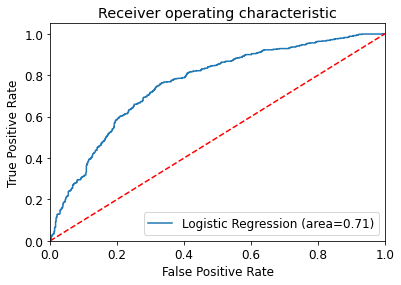

In [65]:
fpr, tpr, thresholds = roc_curve(y,classifier.predict_proba(x)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

# Finding out best threshold

In [66]:
fpr

array([0.        , 0.        , 0.        , 0.00145985, 0.00145985,
       0.00291971, 0.00291971, 0.00437956, 0.00437956, 0.00583942,
       0.00583942, 0.00729927, 0.00729927, 0.00875912, 0.00875912,
       0.01021898, 0.01021898, 0.01167883, 0.01167883, 0.01313869,
       0.01313869, 0.01459854, 0.01459854, 0.01605839, 0.01605839,
       0.01605839, 0.01605839, 0.01605839, 0.01605839, 0.01751825,
       0.01751825, 0.01751825, 0.01751825, 0.0189781 , 0.0189781 ,
       0.02043796, 0.02043796, 0.02189781, 0.02189781, 0.02481752,
       0.02481752, 0.02919708, 0.02919708, 0.03065693, 0.03065693,
       0.03357664, 0.03357664, 0.03357664, 0.0350365 , 0.0350365 ,
       0.03649635, 0.03649635, 0.0379562 , 0.0379562 , 0.03941606,
       0.03941606, 0.04379562, 0.04379562, 0.04525547, 0.04525547,
       0.04671533, 0.04671533, 0.04817518, 0.04817518, 0.04963504,
       0.04963504, 0.05109489, 0.05109489, 0.0540146 , 0.0540146 ,
       0.0540146 , 0.0540146 , 0.05547445, 0.05547445, 0.05839

In [67]:
tpr

array([0.        , 0.00152672, 0.00305344, 0.00305344, 0.00763359,
       0.00763359, 0.01984733, 0.01984733, 0.02442748, 0.02442748,
       0.02900763, 0.02900763, 0.03053435, 0.03053435, 0.03206107,
       0.03206107, 0.0351145 , 0.0351145 , 0.04580153, 0.04580153,
       0.06412214, 0.06412214, 0.06564885, 0.06564885, 0.06870229,
       0.07480916, 0.0870229 , 0.09007634, 0.09312977, 0.09312977,
       0.09618321, 0.10076336, 0.10992366, 0.10992366, 0.11603053,
       0.11603053, 0.12671756, 0.12671756, 0.12824427, 0.12824427,
       0.12977099, 0.12977099, 0.14656489, 0.14656489, 0.15114504,
       0.15114504, 0.15267176, 0.15572519, 0.15572519, 0.16030534,
       0.16030534, 0.16183206, 0.16335878, 0.17709924, 0.17709924,
       0.18625954, 0.18625954, 0.19083969, 0.19083969, 0.20152672,
       0.20152672, 0.20763359, 0.20916031, 0.21221374, 0.21221374,
       0.21374046, 0.21374046, 0.21679389, 0.21679389, 0.2259542 ,
       0.23206107, 0.23816794, 0.23816794, 0.23969466, 0.23969

In [68]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(classifier.predict_proba(x)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls  

,thresholds,accuracy
317,5.324383e-01,0.713433
321,5.285764e-01,0.713433
322,5.250800e-01,0.713433
310,5.392288e-01,0.712687
312,5.370079e-01,0.712687
...,...,...
0,1.769008e+00,0.511194
1,7.690085e-01,0.511194
551,1.432688e-11,0.492537
552,7.980210e-12,0.491791


In [69]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh)) 

Best Threshold=0.525080


In [70]:
threshold = 0.525080
preds = np.where(classifier.predict_proba(x)[:,1] > threshold, 1, 0)
print(classification_report(y,preds))

              precision    recall  f1-score   support

           0       0.75      0.67      0.70       685
           1       0.69      0.76      0.72       655

    accuracy                           0.71      1340
   macro avg       0.72      0.71      0.71      1340
weighted avg       0.72      0.71      0.71      1340



# Logistic Regression using statsmodel

In [71]:
import statsmodels.api as sm   

In [72]:
logit = sm.Logit(Y, X)  

NameError: name 'Y' is not defined

In [ ]:
# P.value for Seatbelt and clmage is significant
# to identify insignificant variables
logit.fit().summary() 